## 参数冻结

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# 加载预训练的模型
model = models.resnet50(pretrained=True)

# 冻结模型的部分权重
for param in model.parameters():
    param.requires_grad = False

# 替换或添加自定义的全连接层
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)  # 假设目标任务是10分类

# 指定需要训练的参数
trainable_params = model.fc.parameters()

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(trainable_params, lr=0.001, momentum=0.9)

# 在训练循环中只更新需要训练的参数
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

## 保存训练日志文件

In [ ]:

train_log_filename = "train_log.txt"
train_log_filepath = os.path.join(result_dir, train_log_filename)
train_log_txt_formatter = "{time_str} [Epoch] {epoch:03d} [Loss] {loss_str}\n"
to_write=train_log_txt_formatter.format(time_str=time.strtime(%Y_%n_%d_%H:%M:%S),
                                        epoch=epoch,
                                        loss_str=" ".join(["{}".format(loss)]))
with open(train_log_filepath,"a") as f:
    f.write(to_write)

## load NPY文件

In [ ]:
import numpy as np


loadData = np.load(r'E:\Shilong\murmur\03_Classifier\test_features.npy')

print("----type----")
print(type(loadData))
print("----shape----")
print(loadData.shape)
print("----data----")
print(loadData)


## 绘制混淆矩阵

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def draw_confusion_matrix(label_true, label_pred, label_name, normlize, title="Confusion Matrix", pdf_save_path=None, dpi=100):
    """

    @param label_true: 真实标签，比如[0,1,2,7,4,5,...]
    @param label_pred: 预测标签，比如[0,5,4,2,1,4,...]
    @param label_name: 标签名字，比如['cat','dog','flower',...]
    @param normlize: 是否设元素为百分比形式
    @param title: 图标题
    @param pdf_save_path: 是否保存，是则为保存路径pdf_save_path=xxx.png | xxx.pdf | ...等其他plt.savefig支持的保存格式
    @param dpi: 保存到文件的分辨率，论文一般要求至少300dpi
    @return:

    example：
            draw_confusion_matrix(label_true=y_gt,
                          label_pred=y_pred,
                          label_name=["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"],
                          normlize=True,
                          title="Confusion Matrix on Fer2013",
                          pdf_save_path="Confusion_Matrix_on_Fer2013.png",
                          dpi=300)

    """
    cm = confusion_matrix(label_true, label_pred)
    if normlize:
        row_sums = np.sum(cm, axis=1)  # 计算每行的和
        cm = cm / row_sums[:, np.newaxis]  # 广播计算每个元素占比
    cm=cm.T
    plt.imshow(cm, cmap='Blues')
    plt.title(title)
    plt.xlabel("Predict label")
    plt.ylabel("Truth label")
    plt.yticks(range(label_name.__len__()), label_name)
    plt.xticks(range(label_name.__len__()), label_name, rotation=45)

    plt.tight_layout()
    plt.colorbar()

    for i in range(label_name.__len__()):
        for j in range(label_name.__len__()):
            color = (1, 1, 1) if i == j else (0, 0, 0)	# 对角线字体白色，其他黑色
            value = float(format('%.2f' % cm[i, j]))
            plt.text(i, j, value, verticalalignment='center', horizontalalignment='center', color=color)

    # plt.show()
    if not pdf_save_path is None:
        plt.savefig(pdf_save_path, bbox_inches='tight',dpi=dpi)


In [ ]:
labels_name=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

y_gt=[]
y_pred=[]
for index, (labels, imgs) in enumerate(test_loader):
    labels_pd = model(imgs)
    predict_np = np.argmax(labels_pd.cpu().detach().numpy(), axis=-1)   # array([0,5,1,6,3,...],dtype=int64)
    labels_np = labels.numpy()                                          # array([0,5,0,6,2,...],dtype=int64)
	
    y_pred.append(labels_np)
    y_gt.append(labels_np)
    
draw_confusion_matrix(label_true=y_gt,			# y_gt=[0,5,1,6,3,...]
                      label_pred=y_pred,	    # y_pred=[0,5,1,6,3,...]
                      label_name=["An", "Di", "Fe", "Ha", "Sa", "Su", "Ne"],
                      normlize=True,
                      title="Confusion Matrix on Fer2013",
                      pdf_save_path="Confusion_Matrix_on_Fer2013.jpg",
                      dpi=300)


## 召回率计算

In [ ]:
from sklearn.metrics import recall_score

pred = [0, 1, 0, 1] # 预测的值
target = [0, 1, 1, 0] # 真实的值

r = recall_score(pred, target)

print(r)



如果不是 0 1 的值，是其他二分类的值，那么就可以通过 labels、pos_label 来指定

In [ ]:
labels = [3,4]  # 二分类 两个类别的值

pred = [3, 4, 3, 4] # 预测的值

target = [3, 4, 4, 3] # 真实的值

r = recall_score(pred, target , labels = labels , pos_label= 3) # pos_label指定正样本的值是多少

print(r)



## 可视化
YAMNet 还会返回一些可用于可视化的附加信息。我们看一下波形、声谱图和推断的热门类。

In [ ]:

plt.figure(figsize=(10, 6))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
plt.subplot(3, 1, 3)
plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

# patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# values from the model documentation
patch_padding = (0.025 / 2) / 0.01
plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# Label the top_N classes.
yticks = range(0, top_n, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_n, 0]))

## 筛选样本

划分train-set,val-set,test-set

In [ ]:
def split_data(data_frame, train_samples, val_samples):
    train_dfs = []
    val_dfs = []
    test_dfs = []
    for category, group in data_frame.groupby("category"):
        train_df = group.sample(n=train_samples)
        group = group.drop(train_df.index)
        val_df = group.sample(n=val_samples)
        group = group.drop(val_df.index)
        test_df = group
        train_dfs.append(train_df)
        val_dfs.append(val_df)
        test_dfs.append(test_df)
    train_df = pd.concat(train_dfs)
    val_df = pd.concat(val_dfs)
    test_df = pd.concat(test_dfs)
    return train_df, val_df, test_df

## 编码，产生掩蔽，对label编码

In [ ]:
class AudioDataset(Dataset):
    def __init__(self, root_dir, data_frame, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data_frame = data_frame

        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(self.data_frame["category"])

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        audio_path = os.path.join(self.root_dir, self.data_frame.iloc[idx]["filename"])
        label = self.data_frame.iloc[idx]["category"]

        # Load audio data and perform any desired transformations
        sig, sr = librosa.load(audio_path, sr=16000, mono=True)
        sig_t = torch.tensor(sig)
        padding_mask = torch.zeros(1, sig_t.shape[0]).bool().squeeze(0)
        if self.transform:
            sig_t = self.transform(sig_t)

        # Encode label as integer
        label = self.label_encoder.transform([label])[0]

        return sig_t, padding_mask, label

## 继承LightningDataModule，产生trainset和valset的dataloader

In [ ]:
class ECS50DataModule(LightningDataModule):
    def __init__(
        self,
        root_dir: str = "/data/ESC-50-master/audio/",
        csv_file: str = "/data/ESC-50-master/meta/esc50.csv",
        batch_size: int = 8,
        split_ratio=0.8,
        transform=None,
        **kwargs
    ):
        super().__init__(**kwargs)
        self.root_dir = root_dir
        self.csv_file = csv_file
        self.batch_size = batch_size
        self.split_ratio = split_ratio
        self.transform = transform

        self.setup()

    def prepare_data(self):
        pass

    def setup(self, stage=None):
        data_frame = pd.read_csv(self.csv_file)
        data_frame = data_frame.sample(frac=1).reset_index(
            drop=True
        )  # shuffle the data frame
        split_index = int(len(data_frame) * self.split_ratio)
        self.train_set = data_frame.iloc[:split_index, :]
        self.val_set = data_frame.iloc[split_index:, :]

    def train_dataloader(self):
        train_df = AudioDataset(
            root_dir=self.root_dir, data_frame=self.train_set, transform=self.transform
        )

        return DataLoader(train_df, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        val_df = AudioDataset(
            root_dir=self.root_dir, data_frame=self.val_set, transform=self.transform
        )

        return DataLoader(val_df, batch_size=self.batch_size, shuffle=False)

In [ ]:
import logging
from datetime import datetime
import sys
def logger_init(log_level=logging.INFO,
                log_dir='./ResultFile/',
                ):
    # 指定路径
    if not os.path.exists(log_dir):
        os.makedirs(log_dir)
  
    log_path = os.path.join(log_dir, '_' + str(datetime.now())[:10] + '.txt')
    formatter = '[%(asctime)s] - %(levelname)s: %(message)s'
    logging.basicConfig(level=log_level,
                        format=formatter,
                        datefmt='%Y-%d-%m %H:%M:%S',
                        handlers=[logging.FileHandler(log_path),
                                logging.StreamHandler(sys.stdout)]
                            )


In [ ]:
def csv_reader_row(file_name,row_num):
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        row=list(reader)
    return row[row_num]

def csv_reader_cl(file_name,clo_num):
    with open(file_name, 'r') as f:
        reader = csv.reader(f)
        column = [row[clo_num] for row in reader]
    return column

import csv
csv_path="E:\\Shilong\\murmur\\dataset_all\\training_data.csv"
# csv_path="E:\\Shilong\\murmur\\circor_digiscope_dataset\\training_data.csv"

# get dataset tag from table
row_line=csv_reader_row(csv_path,0)
tag_list=list()
# get index for 'Patient ID' and 'Outcome'
tag_list.append(row_line.index('Patient ID'))
tag_list.append(row_line.index('Murmur'))
tag_list.append(row_line.index('Murmur locations'))
tag_list.append(row_line.index('Systolic murmur timing'))
tag_list.append(row_line.index('Diastolic murmur timing'))
# for tag_index in tag_list:
id_data=csv_reader_cl(csv_path,tag_list[0])
Murmur=csv_reader_cl(csv_path,tag_list[1])
Murmur_locations=csv_reader_cl(csv_path,tag_list[2])
Systolic_murmur_timing=csv_reader_cl(csv_path,tag_list[3])
Diastolic_murmur_timing=csv_reader_cl(csv_path,tag_list[4])

In [ ]:
absent_id  = [out for out,Murmur in enumerate(Murmur) if Murmur=='Absent']
present_id = [out for out,Murmur in enumerate(Murmur) if Murmur=='Present']
# print(dict(enumerate(id_data[1:])))


In [ ]:
import csv
import os
import librosa
import numpy as np
import pandas as pd

def index_load(tsvname):
    """读取tsv文件内容,不需要close函数"""
    with open(tsvname, 'r') as f:
        txt_data = f.read()
    head=['start','end','period']
    data=txt_data.split('\n')[:-1]
    #遍历每一行
    for l in data:
        sgmt=l.split('\t')
        if sgmt[2]!='0':
            head=np.vstack([head,sgmt])
    return head[1:]

def state_div(tsvname,wavname,state_path,index):
    index_file=index_load(tsvname)
    recording, fs = librosa.load(wavname,sr=4000)
    num=0
    start_index2=0
    end_index2=0
    start_index4=0
    end_index4=0

    for i in range(index_file.shape[0]-3):
        if index_file[i][2]=='2'and index_file[i+2][2]=='4':
            start_index2=float(index_file[i][0])*fs
            end_index2=float(index_file[i][1])*fs
            start_index4=float(index_file[i+2][0])*fs
            end_index4=float(index_file[i+2][1])*fs
            num=num+1
            #  解决出现_0.wav的问题
            print(start_index2,end_index2,start_index4,end_index4)            
            print("=============================================")
            print("wav name: "+wavname)        
            buff2 = recording[int(start_index2) :int(end_index2) ]  # 字符串索引切割
            buff4 = recording[int(start_index4) :int(end_index4) ]  # 字符串索引切割
            print("buff2 len: "+str(len(buff2)),"buff4 len: "+str(len(buff4)))
            # soundfile.write(state_path+"{}_{}_{}.wav".format(index,'Systolic' ,num),buff2,fs)
            # soundfile.write(state_path+"{}_{}_{}.wav".format(index,'Diastolic',num),buff4,fs)

def period_div(path,murmur,patient_id_list,positoin):
    for mur in murmur:
        for patient_id in patient_id_list:
            for pos in positoin:
                dir_path=path+mur+patient_id+"\\"+patient_id+pos
                tsv_path=dir_path+".tsv"
                wav_path=dir_path+".wav"
                if os.path.exists(tsv_path):
                    state_div(tsv_path,wav_path,dir_path+"\\",patient_id+pos)

def get_patientid(csv_path):
    # 'import csv' is required
    with open(csv_path) as csvfile:
        reader = csv.reader(csvfile)
        id = [row[0] for row in reader]   # weight 同列的数据
    return id

murmur=["Absent\\","Present\\"]
positoin=['_AV','_MV','_PV','_TV']
folder_path=r'E:\Shilong\murmur\03_circor_states\\'
absent_csv_path=r'E:\Shilong\murmur\03_Classifier\LM\BEATs\absent_id.csv'
absent_patient_id=get_patientid(absent_csv_path)
period_div(folder_path,murmur,absent_patient_id,positoin)     

In [ ]:
import torchaudio.compliance.kaldi as ta_kaldi
import torch

waveform = torch.randn(1, 2800)
fbank = ta_kaldi.fbank(waveform, num_mel_bins=128, sample_frequency=16000, frame_length=25, frame_shift=10)
 

In [ ]:
def cal_len(dir_path,csv_path,Murmur:str,id_data,Murmur_locations):
    slen=[]
    dlen=[]
    # label=[]
    if not os.path.exists(csv_path):
        os.makedirs(csv_path)

    for root,dir,file in os.walk(dir_path):
        for subfile in file:
            wav_path=os.path.join(root,subfile)            
            if os.path.exists(wav_path):
                # 数据读取
                print("reading: "+subfile)
                y, sr = librosa.load(wav_path, sr=4000)
                y_16k = librosa.resample(y=y, orig_sr=sr, target_sr=16000)
                print("y_16k size: "+str(y_16k.size))
                if subfile.split('_')[2] == 'Systolic':
                    slen.append(y_16k.size)
                else:
                    dlen.append(y_16k.size)    
    return np.array(slen),np.array(dlen)

slen,dlen=cal_len(absent_train_path,absent_train_csv_path,'Absent',id_data,Murmur_locations)# absent

In [ ]:
import torch
import numpy as np
a=np.array([1,2,3,4,5,6,7,8,9,10])
b=torch.tensor(a)
b


In [ ]:
absent_train_csv_path = r'D:\Shilong\murmur\03_circor_states\train_csv'
absent_test_csv_path = r'D:\Shilong\murmur\03_circor_states\test_csv'
present_train_csv_path = r'D:\Shilong\murmur\03_circor_states\train_csv'
present_test_csv_path = r'D:\Shilong\murmur\03_circor_states\test_csv'

filepath=r'D:\Shilong\murmur\03_circor_states'
absent_train_path=r'D:\Shilong\murmur\03_circor_states\train\Absent'
absent_test_path=r'D:\Shilong\murmur\03_circor_states\test\Absent'
present_train_path=r'D:\Shilong\murmur\03_circor_states\train\Present'
present_test_path=r'D:\Shilong\murmur\03_circor_states\test\Present'

atslen,atdlen=cal_len(absent_train_path,absent_train_csv_path,'Absent',id_data,Murmur_locations)# absent
avslen,avdlen=cal_len(absent_test_path,absent_test_csv_path,'Absent',id_data,Murmur_locations)# absent
ptslen,ptdlen=cal_len(present_train_path,present_train_csv_path,'Present',id_data,Murmur_locations)# absent
pvslen,pvdlen=cal_len(present_test_path,present_test_csv_path,'Present',id_data,Murmur_locations)# absent

atslen_path=r'D:\Shilong\murmur\03_circor_states\atslen.csv'
atdlen_path=r'D:\Shilong\murmur\03_circor_states\atdlen.csv'
avslen_path=r'D:\Shilong\murmur\03_circor_states\avslen.csv'
avdlen_path=r'D:\Shilong\murmur\03_circor_states\avdlen.csv'
ptslen_path=r'D:\Shilong\murmur\03_circor_states\ptslen.csv'
ptdlen_path=r'D:\Shilong\murmur\03_circor_states\ptdlen.csv'
pvslen_path=r'D:\Shilong\murmur\03_circor_states\pvslen.csv'
pvdlen_path=r'D:\Shilong\murmur\03_circor_states\pvdlen.csv'

pd.DataFrame(atslen).to_csv(atslen_path, index=False, header=False)
pd.DataFrame(atdlen).to_csv(atdlen_path, index=False, header=False)
pd.DataFrame(avslen).to_csv(avslen_path, index=False, header=False)
pd.DataFrame(avdlen).to_csv(avdlen_path, index=False, header=False)
pd.DataFrame(ptslen).to_csv(ptslen_path, index=False, header=False)
pd.DataFrame(ptdlen).to_csv(ptdlen_path, index=False, header=False)
pd.DataFrame(pvslen).to_csv(pvslen_path, index=False, header=False)
pd.DataFrame(pvdlen).to_csv(pvdlen_path, index=False, header=False)

In [ ]:
import os
import shutil
absent_1=0
persent_1=0
absent_2=0
persent_2=0


file_path_train=r'D:\Shilong\murmur\03_circor_states\train'
file_path_test=r'D:\Shilong\murmur\03_circor_states\test'
target_dir_train_a=r'D:\Shilong\murmur\03_circor_states\trainset\absent'
target_dir_train_p=r'D:\Shilong\murmur\03_circor_states\trainset\present'
target_dir_test_a=r'D:\Shilong\murmur\03_circor_states\testset\absent'
target_dir_test_p=r'D:\Shilong\murmur\03_circor_states\testset\present'

for root,dir,file in os.walk(file_path_train):
    for subfile in file:
        files=os.path.join(root,subfile)
        print(subfile)
        state=subfile.split("_")[4]        
        if state=='Absent':
            shutil.copy(files, target_dir_train_a + "\\")
        if state=='Present':
            shutil.copy(files, target_dir_train_p + "\\")

for root,dir,file in os.walk(file_path_test):
    for subfile in file:
        files=os.path.join(root,subfile)
        print(subfile)
        state=subfile.split("_")[4]        
        if state=='Absent':
            shutil.copy(files, target_dir_test_a + "\\")
        if state=='Present':
            shutil.copy(files, target_dir_test_p + "\\")



## Audio data augmentation

Speed tuning

In [ ]:
speed_rate = np.random.uniform(0.7,1.3)
wav_speed_tune = cv2.resize(wav, (1, int(len(wav) * speed_rate))).squeeze()
print('speed rate: %.3f' % speed_rate, '(lower is faster)')
if len(wav_speed_tune) < 16000:
    pad_len = 16000 - len(wav_speed_tune)
    wav_speed_tune = np.r_[np.random.uniform(-0.001,0.001,int(pad_len/2)),
                           wav_speed_tune,
                           np.random.uniform(-0.001,0.001,int(np.ceil(pad_len/2)))]
else: 
    cut_len = len(wav_speed_tune) - 16000
    wav_speed_tune = wav_speed_tune[int(cut_len/2):int(cut_len/2)+16000]
print('wav length: ', wav_speed_tune.shape[0])
ipd.Audio(wav_speed_tune, rate=sr)

Mix background noise & volume tuning

In [ ]:
bg_files = os.listdir('../input/train/audio/_background_noise_/')
bg_files.remove('README.md')
chosen_bg_file = bg_files[np.random.randint(6)]
bg, sr = librosa.load('../input/train/audio/_background_noise_/'+chosen_bg_file, sr=None)
print(chosen_bg_file,'|', bg.shape[0], bg.max(), bg.min())
ipd.Audio(bg, rate=sr) # !! be prepared when playing the noise, bacause it's so ANNOYING !!

start_ = np.random.randint(bg.shape[0]-16000)
bg_slice = bg[start_ : start_+16000]
wav_with_bg = wav * np.random.uniform(0.8, 1.2) + \
              bg_slice * np.random.uniform(0, 0.1)
ipd.Audio(wav_with_bg, rate=sr) 

stretching the sound

In [ ]:
import librosa
import matplotlib.pyplot as plt
import matplotlib as mpl
import IPython.display as ipd
import numpy as np
import soundfile
def stretch(data, rates):   
    data = librosa.effects.time_stretch(data, rate=rates)
    return data
    

def get_spectrogram(wav):
    D = librosa.stft(wav, n_fft=480, hop_length=160,
                     win_length=480, window='hamming')
    spect, phase = librosa.magphase(D)
    return spect
    
if __name__ == "__main__":
    data,sr=librosa.load(r'D:\Shilong\murmur\03_circor_states\Absent\2530\2530_AV\.wav', sr=4000)
    data_stretch =stretch(data, 2)


    data_stretch_log_spect = 20*np.log10(get_spectrogram(data_stretch))
    data_log_spect = np.log(get_spectrogram(data))
    # soundfile.write(r"D:\Shilong\murmur\03_circor_states\Absent\2530\2530AV.wav",
    #             data,
    #             sr*2,
    #         )
    soundfile.write(r"D:\Shilong\murmur\03_circor_states\Absent\2530_AV.wav",
    data_stretch,
    sr,
            )

   
    plt.title('spectrogram of origin audio and stretch audio')
    plt.subplot(2, 1, 1)   
    plt.imshow(data_log_spect, aspect='auto', origin='lower',)    
    plt.subplot(2, 1, 2)
    plt.imshow(data_stretch_log_spect, aspect='auto', origin='lower',)

    plt.show()

## AUDIO FEATURE AUGMENTATION

2.0.0
2.0.0+cpu


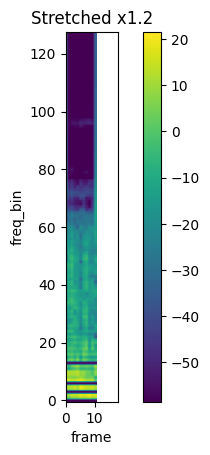

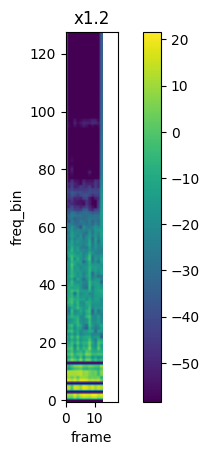

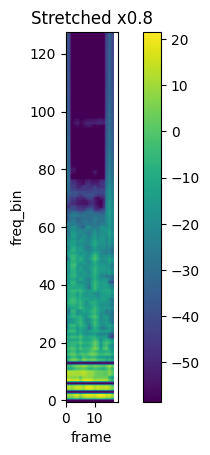

In [22]:
import torch
import torchaudio
import torchaudio.transforms as T
print(torch.__version__)
print(torchaudio.__version__)

import librosa
import matplotlib.pyplot as plt


wav_path = r'D:\Shilong\murmur\03_circor_states\trainset\time_stretch1.2\9979_AV_Systolic_1_Present_Holosystolic.wav_time1.2.wav'
def get_spectrogram(
    n_fft=400,
    win_len=None,
    hop_len=None,
    power=2.0,
    path=wav_path,
):
    waveform, _ = torchaudio.load(path)
    waveform = torchaudio.transforms.Resample(4000, 16000)(waveform)
    spectrogram = T.Spectrogram(
        n_fft=n_fft,
        win_length=win_len,
        hop_length=hop_len,
        center=True,
        pad_mode="reflect",
        power=power,
    )
    melspec=T.MelSpectrogram(
        sample_rate = 16000,
        n_fft= 400,       
        )
    return melspec(waveform)



def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
    
# TimeStretch

spec = get_spectrogram(power=None)
stretch = T.TimeStretch(n_freq = 128)

rate = 1.2
spec_ = stretch(spec, rate)
plot_spectrogram(torch.abs(spec_[0]), title=f"Stretched x{rate}", aspect="equal", xmax=18)

plot_spectrogram(torch.abs(spec[0]), title="x1.2", aspect="equal", xmax=18)

rate = 0.8
spec_ = stretch(spec, rate)
plot_spectrogram(torch.abs(spec_[0]), title=f"Stretched x{rate}", aspect="equal", xmax=18)

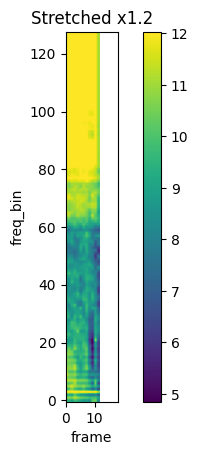

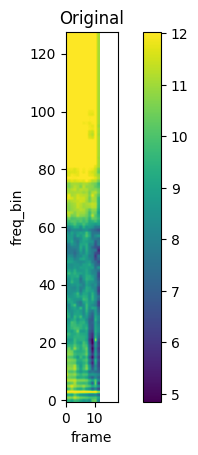

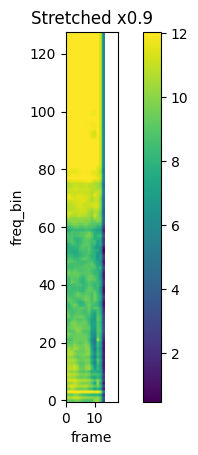

In [9]:
import librosa
import matplotlib.pyplot as plt
import torchaudio.compliance.kaldi as ta_kaldi

wav_path = r'D:\Shilong\murmur\03_circor_states\Absent\2530\2530_AV\2530_AV_Diastolic_10_Absent_nan.wav'
waveform,_=torchaudio.load(wav_path)

waveform = torchaudio.transforms.Resample(4000, 16000)(waveform)
fbank = ta_kaldi.fbank(
                waveform,
                num_mel_bins=128,
                sample_frequency=16000,
                frame_length=25,
                frame_shift=10,
            )
fbank = torch.transpose(fbank, 0, 1)
fbank = fbank.unsqueeze(0)
stretch = T.TimeStretch(n_freq = 128)

def plot_spectrogram(spec, title=None, ylabel="freq_bin", aspect="auto", xmax=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(spec), origin="lower", aspect=aspect)
    if xmax:
        axs.set_xlim((0, xmax))
    fig.colorbar(im, ax=axs)
    plt.show(block=False)
    
rate = 1.2
fbank = stretch(fbank, rate)
# fbank = torch.transpose(fbank, 0, 1)
plot_spectrogram(torch.abs(fbank[0]), title=f"Stretched x{rate}", aspect="equal", xmax=18)

plot_spectrogram(torch.abs(fbank[0]), title="Original", aspect="equal", xmax=18)

rate = 0.9
fbank = stretch(fbank, rate)
plot_spectrogram(torch.abs(fbank[0]), title=f"Stretched x{rate}", aspect="equal", xmax=18)

## wav mask


torch.Size([1, 128, 2])
torch.Size([128, 2])


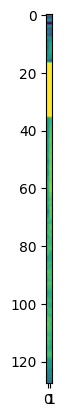

In [6]:
import torch, torchaudio
from matplotlib import pyplot as plt

# \2530_AV_Diastolic_10_Absent_nan
waveform, _ = torchaudio.load(r'D:\Shilong\murmur\03_circor_states\Absent\2530\2530_AV\2530_AV_Diastolic_10_Absent_nan.wav')
fbank = torchaudio.compliance.kaldi.fbank(waveform, htk_compat=True, sample_frequency=16000, use_energy=False, window_type='hanning', num_mel_bins=128, dither=0.0, frame_shift=10)
freqm=40# 横向
timem=0# 纵向
freqm = torchaudio.transforms.FrequencyMasking(freqm)
timem = torchaudio.transforms.TimeMasking(timem)
fbank = torch.transpose(fbank, 0, 1)

# NOTE this line, this is the trick, new torchaudio expect [1, freq, time] while old support [freq, time]
# comment this line will lead to an issue.
fbank = fbank.unsqueeze(0)
print(fbank.shape)
if freqm != 0:
    fbank = freqm(fbank)
if timem != 0:
    fbank = timem(fbank)

plt.imshow(fbank[0].cpu().numpy())
fbank = fbank.squeeze(0)
print(fbank.shape)

In [5]:
import torch
import torchaudio
from torchaudio.transforms import TimeStretch

# 加载音频文件
waveform, sample_rate = torchaudio.load(r'D:\Shilong\murmur\03_circor_states\Absent\2530\2530_AV.wav')
# 转换为一维张量
waveform = waveform[0, :]

# 创建时间拉伸的变换器
time_stretch = TimeStretch()

# 设置拉伸因子
stretch_factor = 1.5

# 创建与波形数据样本数相匹配的拉伸因子张量
num_samples = waveform.size(0)
stretch_factor_tensor = torch.tensor([stretch_factor]).expand(num_samples)

# 将拉伸因子转换为布尔值
stretch_factor_tensor = stretch_factor_tensor.bool()

# 进行时间拉伸
stretched_waveform = time_stretch(waveform, stretch_factor_tensor)

# 保存拉伸后的音频文件
torchaudio.save('stretched_audio.wav', stretched_waveform, sample_rate)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [4]:
import os
import numpy as np
import librosa
import soundfile as sf

speed_factor=1.2
time_path=r'D:\Shilong\murmur\03_circor_states\trainset\time_stretch1.2'
path=r'D:\Shilong\murmur\03_circor_states\trainset\present'
for root,dir,file in os.walk(path):
    for filename in file:
        print("processing "+filename)
        wav_path=os.path.join(root,filename)
        data, sr = librosa.load(wav_path, sr=None)
        data_time_stretch=librosa.effects.time_stretch(data, rate=speed_factor)
        sf.write(os.path.join(time_path,filename+'_time1.2.wav'),data_time_stretch,sr)




        


processing 13918_TV_Systolic_1_Present_Holosystolic.wav
processing 13918_TV_Systolic_2_Present_Holosystolic.wav
processing 13918_TV_Systolic_3_Present_Holosystolic.wav
processing 13918_TV_Systolic_4_Present_Holosystolic.wav
processing 13918_TV_Systolic_5_Present_Holosystolic.wav
processing 13918_TV_Systolic_6_Present_Holosystolic.wav
processing 13918_TV_Systolic_7_Present_Holosystolic.wav
processing 13918_TV_Systolic_8_Present_Holosystolic.wav
processing 13918_TV_Systolic_9_Present_Holosystolic.wav
processing 29045_AV_Systolic_10_Present_Holosystolic.wav
processing 29045_AV_Systolic_11_Present_Holosystolic.wav
processing 29045_AV_Systolic_12_Present_Holosystolic.wav
processing 29045_AV_Systolic_13_Present_Holosystolic.wav
processing 29045_AV_Systolic_14_Present_Holosystolic.wav
processing 29045_AV_Systolic_15_Present_Holosystolic.wav
processing 29045_AV_Systolic_16_Present_Holosystolic.wav
processing 29045_AV_Systolic_17_Present_Holosystolic.wav
processing 29045_AV_Systolic_18_Present_

## 数据微调

In [ ]:
import torch
from torch.utils.data import DataLoader
from transformers import BertForSequenceClassification, BertTokenizer, AdamW

# 定义设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 加载预训练的BERT模型和tokenizer
model_name = 'bert-base-uncased'
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = BertTokenizer.from_pretrained(model_name)

# 加载微调数据集
train_dataset = YOUR_TRAIN_DATASET  # 替换为你自己的训练数据集
val_dataset = YOUR_VALIDATION_DATASET  # 替换为你自己的验证数据集

# 定义批处理大小和训练时的批处理器
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 定义优化器和训练参数
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 5

# 将模型移动到设备上
model.to(device)

# 训练和微调过程
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        # 准备数据
        inputs = tokenizer(batch['text'], padding=True, truncation=True, return_tensors="pt")
        labels = batch['label'].to(device)
        inputs = {key: val.to(device) for key, val in inputs.items()}

        # 前向传播
        outputs = model(**inputs, labels=labels)
        loss = outputs.loss

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # 在验证集上进行评估
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = tokenizer(batch['text'], padding=True, truncation=True, return_tensors="pt")
            labels = batch['label'].to(device)
            inputs = {key: val.to(device) for key, val in inputs.items()}

            outputs = model(**inputs, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            val_loss += loss.item()

            predictions = torch.argmax(logits, dim=1)
            correct_predictions += torch.sum(predictions == labels).item()
            total_predictions += len(labels)

    # 打印训练和验证信息
    avg_train_loss = train_loss / len(train_dataloader)
    avg_val_loss = val_loss / len(val_dataloader)
    val_accuracy = correct_predictions / total_predictions

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {avg_train_loss:.4f}")
    print(f"Val Loss: {avg_val_loss:.4f}")
    print(f"Val Accuracy: {val_accuracy:.2%}")

# 保存微调后的模型
model.save_pretrained("fine-tuned-model")

## 不同层对学习结果的贡献

In [ ]:

# 梯度类别激活图（Grad-CAM）：
import torch
from torchvision import models, transforms
from PIL import Image

# 加载预训练的模型
model = models.resnet50(pretrained=True)
model.eval()

# 图像预处理
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 读取并预处理图像
image = Image.open('image.jpg')
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)

# 将输入图像转换为梯度可计算的形式
input_batch.requires_grad_()

# 前向传播
output = model(input_batch)
target_class = torch.argmax(output)

# 反向传播计算梯度
model.zero_grad()
output[0, target_class].backward()

# 获取目标层的梯度
grads = model.get_activations_gradient()

# 获取目标层的特征图
target_activations = model.get_activations(input_batch).detach()

# 计算类别激活图
weights = torch.mean(grads, dim=(2, 3))[0]
grad_cam = torch.sum(weights * target_activations, dim=1).relu()

# 可视化类别激活图
grad_cam = torch.nn.functional.interpolate(grad_cam.unsqueeze(0), size=(224, 224), mode='bilinear', align_corners=False)
grad_cam = torch.nn.functional.normalize(grad_cam, dim=1)

# 可以根据需要使用matplotlib等库进行可视化展示

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import cv2
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import models
from torchvision import transforms
from PIL import Image
from model_M7 import mobilenet_M7_large
import json

#导入预先训练好的网络
model = mobilenet_M7_large(num_classes=4)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_weight_path = "M7/best_M7.pth"  #修改自己的权重文件
model.load_state_dict(torch.load(model_weight_path))
# model = torch.load(model_weight_path, map_location=device)
model.eval()
print(model) #可以注释掉

#读取一张图片，对其可视化
im = Image.open("test_image/0.jpg")
imarray = np.asarray(im) / 255.0
# plt.figure()
# plt.imshow(imarray)
# plt.show()

#数据预处理
data_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
input_im = data_transforms(im).unsqueeze(0)
print("input_im.shape:",input_im.shape)

#定义辅助函数，获取指定层名称的特征，定义钩子hook
activation = {}
def get_activation(name):
    def hook(model,input,output):
        activation[name] = output.detach()
    return hook

#获取中间卷积后的图像特征
model.eval()
#获取网络中第6层，经过第一次注意力后的特征映射，第一张特征图。
model.features[6].register_forward_hook(get_activation("SqueezeExcitation"))
_ = model(input_im)
SqueezeExcitation = activation["SqueezeExcitation"]
print("获取特征的尺寸为：",SqueezeExcitation.shape)

plt.figure(figsize=(10, 4))
for ii in range(SqueezeExcitation.shape[1]):
    # 可视化每张手写体
    plt.subplot(4, 10, ii + 1)
    plt.imshow(SqueezeExcitation.data.numpy()[0, ii, :, :], cmap="gray")
    plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig("SqueezeExcitation6 map")
#获取更深层次的卷积后的图像特征
model.eval()
#获取网络中第14层，经过第二次注意力的特征映射，第二张特征图。
model.features[14].register_forward_hook(get_activation("SqueezeExcitation"))
_ = model(input_im)
SqueezeExcitation = activation["SqueezeExcitation"]
print("获取特征的尺寸为：",SqueezeExcitation.shape)

plt.figure(figsize=(10, 4))   
for ii in range(40):
    # 可视化每张手写体
    plt.subplot(4, 10, ii + 1)
    plt.imshow(SqueezeExcitation.data.numpy()[0, ii, :, :], cmap="gray")
    plt.axis("off")
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig("SqueezeExcitation14 map")
plt.show()


ModuleNotFoundError: No module named 'cv2'

In [ ]:
# Training Function 
def train(num_epochs): 
    best_accuracy = 0.0 
     
    print("Begin training...") 
    for epoch in range(1, num_epochs+1): 
        running_train_loss = 0.0 
        running_accuracy = 0.0 
        running_vall_loss = 0.0 
        total = 0 
 
        # Training Loop 
        for data in train_loader: 
        #for data in enumerate(train_loader, 0): 
            inputs, outputs = data  # get the input and real species as outputs; data is a list of [inputs, outputs] 
            optimizer.zero_grad()   # zero the parameter gradients          
            predicted_outputs = model(inputs)   # predict output from the model 
            train_loss = loss_fn(predicted_outputs, outputs)   # calculate loss for the predicted output  
            train_loss.backward()   # backpropagate the loss 
            optimizer.step()        # adjust parameters based on the calculated gradients 
            running_train_loss +=train_loss.item()  # track the loss value 
 
        # Calculate training loss value 
        train_loss_value = running_train_loss/len(train_loader) 
 
        # Validation Loop 
        with torch.no_grad(): 
            model.eval() 
            for data in validate_loader: 
                inputs, outputs = data 
                predicted_outputs = model(inputs) 
                val_loss = loss_fn(predicted_outputs, outputs) 
                
                # The label with the highest value will be our prediction 
                _, predicted = torch.max(predicted_outputs, 1) 
                running_vall_loss += val_loss.item()  
                total += outputs.size(0) 
                running_accuracy += (predicted == outputs).sum().item() 

        # Calculate validation loss value 
        val_loss_value = running_vall_loss/len(validate_loader) 
                
        # Calculate accuracy as the number of correct predictions in the validation batch divided by the total number of predictions done.  
        accuracy = (100 * running_accuracy / total)     

        # Save the model if the accuracy is the best 
        if accuracy > best_accuracy: 
            saveModel() 
            best_accuracy = accuracy 

        # Print the statistics of the epoch 
        print('Completed training batch', epoch, 'Training Loss is: %.4f' %train_loss_value, 'Validation Loss is: %.4f' %val_loss_value, 'Accuracy is %d %%' % (accuracy))